In [8]:
# Import necessary libraries
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules


In [9]:
with open(r'C:\Users\Admin\OneDrive\Máy tính\Projects\fpgrowth\dataset\groceries.csv') as file:
  df = pd.read_csv(file)

In [10]:
# Dataset
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [11]:
# Shape of the dataset
df.shape

(38765, 3)

In [12]:
# General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [13]:
# Rename the name of the columns for convenience
colnames = ['uid', 'date', 'items']
df = df.set_axis(labels=colnames, axis=1)
df

,uid,date,items
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [14]:
# Create corresponding dataframe for transactions
transactions_df = pd.DataFrame(data=df[['uid', 'date']], columns=df.columns)
transactions_df['items'] = df['items'].transform(lambda x: [x])
transactions_df = transactions_df.groupby(['uid', 'date']).sum()
print(transactions_df.shape)
transactions_df

(14963, 1)


items
uid  date                                                         
1000 15-03-2015  [sausage, whole milk, semi-finished bread, yog...
     24-06-2014                  [whole milk, pastry, salty snack]
     24-07-2015                     [canned beer, misc. beverages]
     25-11-2015                        [sausage, hygiene articles]
     27-05-2015                         [soda, pickled vegetables]
...                                                            ...
4999 24-01-2015  [tropical fruit, berries, other vegetables, yo...
     26-12-2015                             [bottled water, herbs]
5000 09-03-2014                    [fruit/vegetable juice, onions]
     10-02-2015       [soda, root vegetables, semi-finished bread]
     16-11-2014                   [bottled beer, other vegetables]

[14963 rows x 1 columns]

In [15]:
num_of_customers = len(list(set(df['uid'].values)))
num_of_items = len(list(set(df['items'].values)))
num_of_transactions = transactions_df.shape[0]

# Number of customers, items, and transactions
print(f'Total number of customers: {num_of_customers}')
print(f'Total number of items: {num_of_items}')
print(f'Total number of transactions: {num_of_transactions}')

Total number of customers: 3898
Total number of items: 167
Total number of transactions: 14963


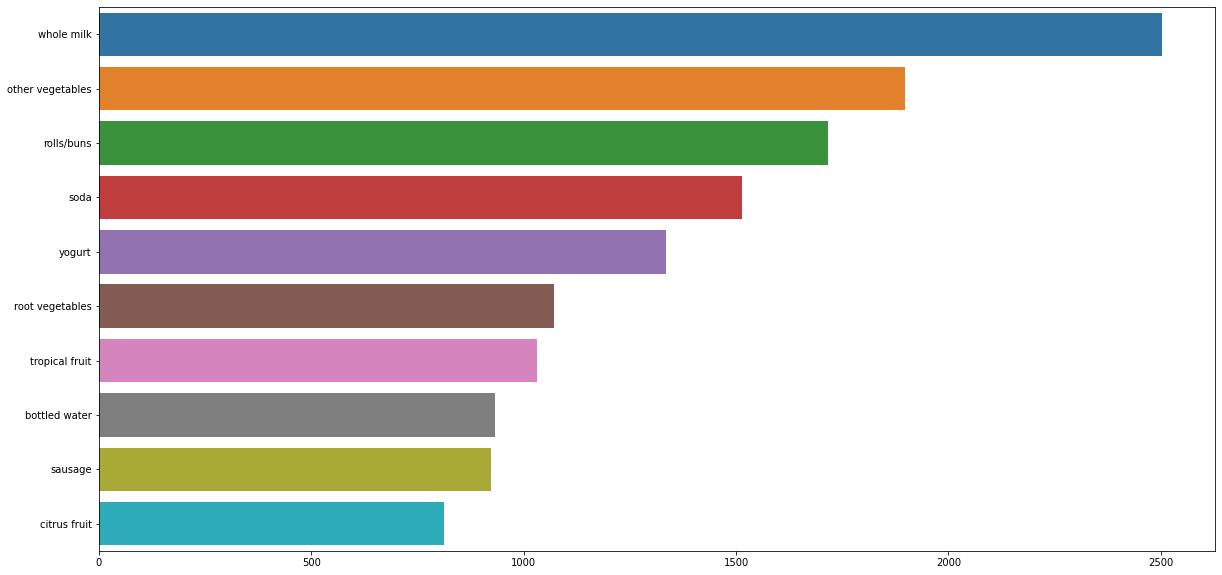

In [16]:
# Top ten best-seller items
top_ten_items = df['items'].value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(20, 10))
s = sns.barplot(x=top_ten_items.values, y=top_ten_items.index)

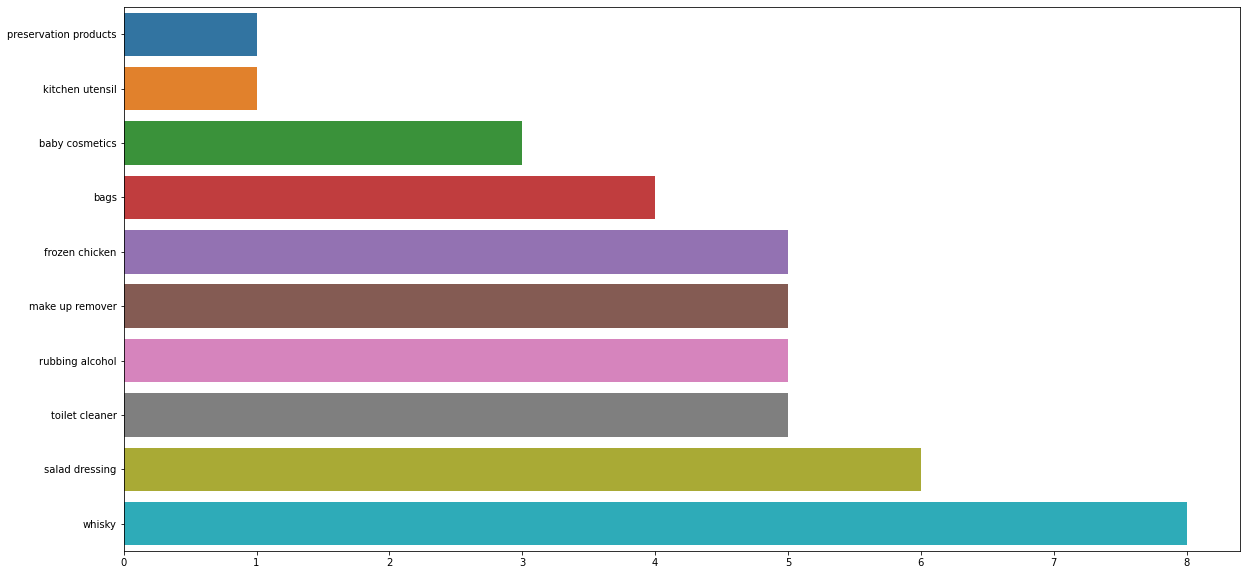

In [17]:
# Bottom ten least sold items
bottom_ten_items = df['items'].value_counts().sort_values(ascending=True)[:10]
plt.figure(figsize=(20, 10))
s = sns.barplot(x=bottom_ten_items.values, y=bottom_ten_items.index)

In [18]:
# Before we can apply FP-Growth on the dataset, we need to tranform it into a spare matrix

transactions = transactions_df['items']
transactions = transactions.droplevel(0)

enc = TransactionEncoder()
transactions = pd.DataFrame(enc.fit(transactions).transform(transactions), columns=enc.columns_)
transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# Generate frequent itemsets which contains maximum 2 different items
frequent_itemsets = fpgrowth(transactions, min_support= 6/len(transactions_df), use_colnames=True, max_len=2)
frequent_itemsets

,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.009490,(semi-finished bread)
4,0.051728,(pastry)
...,...,...
1773,0.000468,"(frozen dessert, yogurt)"
1774,0.000401,"(newspapers, frozen dessert)"
1775,0.000601,"(frozen dessert, soda)"
1776,0.000468,"(canned beer, frozen dessert)"


In [25]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(napkins),(semi-finished bread),0.022121,0.009490,0.000468,0.021148,2.228437,0.000258,1.011910
1,(semi-finished bread),(napkins),0.009490,0.022121,0.000468,0.049296,2.228437,0.000258,1.028584
2,(chicken),(hygiene articles),0.027869,0.013700,0.000668,0.023981,1.750366,0.000287,1.010533
3,(hygiene articles),(chicken),0.013700,0.027869,0.000668,0.048780,1.750366,0.000287,1.021984
4,(ham),(pickled vegetables),0.017109,0.008955,0.000535,0.031250,3.489506,0.000381,1.023014
...,...,...,...,...,...,...,...,...,...
185,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
186,(newspapers),(frozen dessert),0.038896,0.006148,0.000401,0.010309,1.676714,0.000162,1.004204
187,(frozen dessert),(newspapers),0.006148,0.038896,0.000401,0.065217,1.676714,0.000162,1.028158
188,(canned beer),(frozen dessert),0.046916,0.006148,0.000468,0.009972,1.621779,0.000179,1.003862


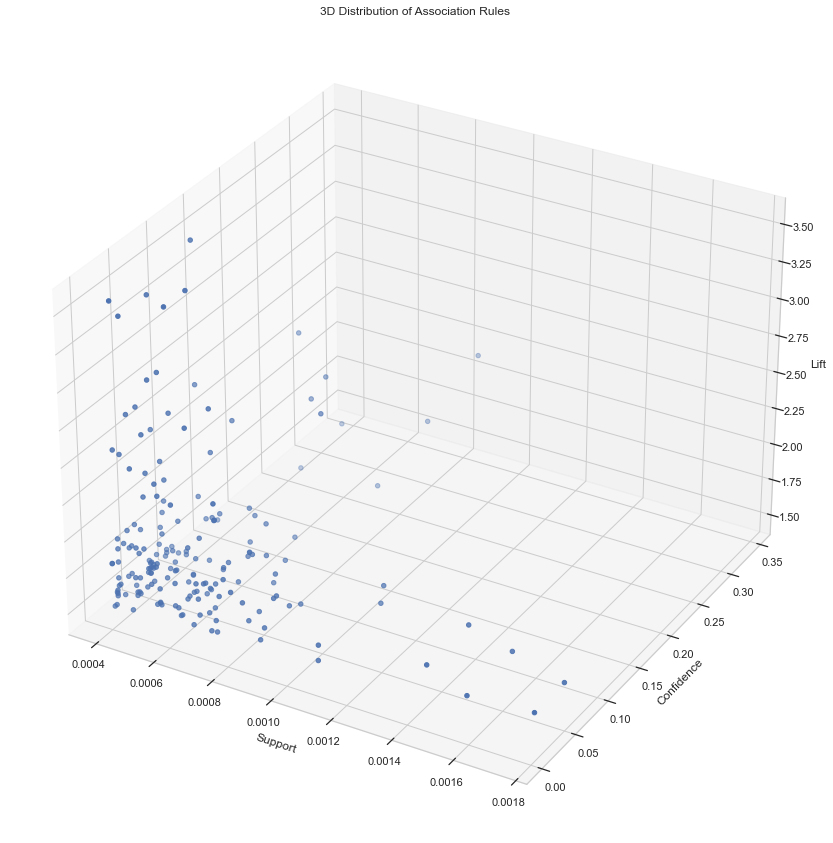

In [26]:
# Plot a 3D scatter for the association rules
sns.set(style='whitegrid')
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')

ax.scatter(x, y, z)
ax.set_title('3D Distribution of Association Rules')

plt.show()

In [27]:
# Add a new column "rule" to the dataframe for convenience
rules['rule'] = rules['antecedents'].transform(lambda x: str(set(x))) + ' -> ' + rules['consequents'].transform(lambda x: str(set(x)))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
0,(napkins),(semi-finished bread),0.022121,0.009490,0.000468,0.021148,2.228437,0.000258,1.011910,{'napkins'} -> {'semi-finished bread'}
1,(semi-finished bread),(napkins),0.009490,0.022121,0.000468,0.049296,2.228437,0.000258,1.028584,{'semi-finished bread'} -> {'napkins'}
2,(chicken),(hygiene articles),0.027869,0.013700,0.000668,0.023981,1.750366,0.000287,1.010533,{'chicken'} -> {'hygiene articles'}
3,(hygiene articles),(chicken),0.013700,0.027869,0.000668,0.048780,1.750366,0.000287,1.021984,{'hygiene articles'} -> {'chicken'}
4,(ham),(pickled vegetables),0.017109,0.008955,0.000535,0.031250,3.489506,0.000381,1.023014,{'ham'} -> {'pickled vegetables'}


In [28]:
# Plot a interactive 3D scatter of association rules
scatter_fig = px.scatter_3d(rules.sort_values(by=['confidence'], ascending=False)[:10], x='support', y='confidence', z='lift', color='rule')
scatter_fig.show()

In [29]:
# This equals to whole_milk_rules = rules[rules['consequants'] == {'whole milk'}]
# Select assocation rules in which "whole milk is the consequent"
whole_milk_rules = rules[rules['consequents'].astype(str).str.contains('whole milk')]
whole_milk_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
35,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523,{'softener'} -> {'whole milk'}
150,(house keeping products),(whole milk),0.003007,0.157923,0.000735,0.244444,1.547872,0.000260,1.114514,{'house keeping products'} -> {'whole milk'}
165,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868,{'artif. sweetener'} -> {'whole milk'}
179,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,{'brandy'} -> {'whole milk'}
181,(light bulbs),(whole milk),0.001938,0.157923,0.000468,0.241379,1.528463,0.000162,1.110011,{'light bulbs'} -> {'whole milk'}
182,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,{'syrup'} -> {'whole milk'}
185,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,{'canned fruit'} -> {'whole milk'}


In [30]:
# Infer from the rules
whole_milk_rules = whole_milk_rules.sort_values(by=['lift'], ascending=False).reset_index(drop=True)
whole_milk_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
0,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,{'brandy'} -> {'whole milk'}
1,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523,{'softener'} -> {'whole milk'}
2,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,{'syrup'} -> {'whole milk'}
3,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,{'canned fruit'} -> {'whole milk'}
4,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868,{'artif. sweetener'} -> {'whole milk'}
5,(house keeping products),(whole milk),0.003007,0.157923,0.000735,0.244444,1.547872,0.000260,1.114514,{'house keeping products'} -> {'whole milk'}
6,(light bulbs),(whole milk),0.001938,0.157923,0.000468,0.241379,1.528463,0.000162,1.110011,{'light bulbs'} -> {'whole milk'}
